# Desafio - Módulo 9 - Curso Aceleradev de Data Science da Codenation

### Guilherme Barros Alves Pereira

### Importando as bibliotecas necessárias

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import imblearn

### Importando os dataset

In [4]:
df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv')

### Analise exploratório de dados

In [5]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [6]:
test_df.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [7]:
test_df.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [8]:
df_aux = pd.DataFrame({'coluna': df.columns, 'tipo': df.dtypes, 'na_count': df.isna().sum(),
                       'na_percent': df.isna().sum()/df.shape[0]})
df_aux.sort_values('na_percent', ascending=False)[:20]

,coluna,tipo,na_count,na_percent
SG_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,object,12092,0.880699
CO_UF_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,float64,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,NO_ENTIDADE_CERTIFICACAO,object,12092,0.880699
Q041,Q041,float64,10792,0.786016
TP_SIT_FUNC_ESC,TP_SIT_FUNC_ESC,float64,9448,0.688128
TP_LOCALIZACAO_ESC,TP_LOCALIZACAO_ESC,float64,9448,0.688128
TP_DEPENDENCIA_ADM_ESC,TP_DEPENDENCIA_ADM_ESC,float64,9448,0.688128
SG_UF_ESC,SG_UF_ESC,object,9448,0.688128
CO_UF_ESC,CO_UF_ESC,float64,9448,0.688128
NO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,object,9448,0.688128


In [9]:
# Podemos ver que os dados estão muito desbalanceados
df['IN_TREINEIRO'].value_counts(normalize=True)

0    0.870138
1    0.129862
Name: IN_TREINEIRO, dtype: float64

### Pré-processamento de dados

In [12]:
if 'Q041' in df.columns:

    # Algumas colunas tem mais de 50% de dados faltantes, imputar os dados não traria beneficio ao modelo de ML, 
    # assim essas colunas serão deletadas

    print('Começando o pré-processamento dos dados ...\n')
    colComMuitosDadosFaltantes = [*df_aux [df_aux['na_percent'] >= 0.5]['coluna'].values]
    print('Deletando {} colunas do dataset de treino e teste, porque mais de 50% dos dados neles \
estão ausentes\n'.format(len(colComMuitosDadosFaltantes)))
    df.drop(colComMuitosDadosFaltantes, axis=1, inplace=True)

    col = [i for i in test_df.columns if i in colComMuitosDadosFaltantes]
    test_df.drop(col, axis=1, inplace=True)
    print('Colunas removidas: \n{}\n'.format(colComMuitosDadosFaltantes))


    # Selecionando apenas as colunas presentes em ambos os datasets + IN_TREINEIRO
    df = df[[*test_df.columns] + ['IN_TREINEIRO']]
    print('Selecionando apenas as colunas presentes em ambos os datasets\n')


    colunas_dropadas = ['NU_INSCRICAO', 'CO_UF_RESIDENCIA']

    num = re.compile('NU_')
    colunas_numericas = [i for i in filter(num.match, test_df.columns) if i not in colunas_dropadas]

    cat = re.compile('SG_|TP_|IN_|Q0')
    colunas_categoricas = [i for i in filter(cat.match, test_df.columns) if i not in colunas_dropadas]


    df.drop(colunas_dropadas, axis=1, inplace=True)
    print('As seguintes colunas foram removidas, por não contribuir em prever se o estudante é treineiro ou \
por já ter coluna com a mesma informação\n'.format(colunas_dropadas))

    df[colunas_categoricas] = df[colunas_categoricas].astype('category')
    test_df[colunas_categoricas] = test_df[colunas_categoricas].astype('category')
    print('As colunas necessárias dos datasets de treino e test foram convertidas para o tipo categóricas\n')

    colWithMissingValues = [col for col, value in zip(df.isna().sum().index, df.isna().sum().values) if value > 0]
    testColWithMissingValues = [col for col, value in zip(test_df.isna().sum().index, test_df.isna().sum().values) if value > 0]
    df['TP_STATUS_REDACAO'].cat.add_categories(0, inplace=True)
    df[colWithMissingValues] = df[colWithMissingValues].fillna(0)
    test_df['TP_STATUS_REDACAO'].cat.add_categories(0, inplace=True)
    test_df[testColWithMissingValues] = test_df[testColWithMissingValues].fillna(0)
    print('Preenchendo os valores ausentes das colunas relativas a notas e status da redação com 0')
    
else:
    print('Pré-processamento já realizado')

Começando o pré-processamento dos dados ...

Deletando 20 colunas do dataset de treino e teste, porque mais de 50% dos dados neles estão ausentes

Colunas removidas: 
['TP_ENSINO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NO_ENTIDADE_CERTIFICACAO', 'CO_UF_ENTIDADE_CERTIFICACAO', 'SG_UF_ENTIDADE_CERTIFICACAO', 'Q027', 'Q028', 'Q029', 'Q030', 'Q031', 'Q032', 'Q033', 'Q041']

Selecionando apenas as colunas presentes em ambos os datasets

As seguintes colunas foram removidas, por não contribuir em prever se o estudante é treineiro ou por já ter coluna com a mesma informação

As colunas necessárias dos datasets de treino e test foram convertidas para o tipo categóricas

Preenchendo os valores ausentes das colunas relativas a notas e status da redação com 0


In [13]:
print(colunas_categoricas)
categoriesTransform = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', \
                       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', \
                       'TP_PRESENCA_MT', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']

['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']


In [56]:
inscricao = test_df['NU_INSCRICAO']
X_test = test_df.drop(colunas_dropadas, axis=1)
y = df['IN_TREINEIRO']
X = df.drop('IN_TREINEIRO', axis=1)

### Pipeline

In [57]:
preProcessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), colunas_categoricas), \
                                               ('scaler', StandardScaler(), colunas_numericas)])
clf = Pipeline(steps=[('preprocessor', preProcessor), ('clf', LogisticRegression(max_iter=300))])

### Buscando balancear o dataset

In [30]:
X_transformed = preProcessor.fit_transform(X)
colTransformed = [*preProcessor.named_transformers_['encoder'].get_feature_names()] + preProcessor.transformers_[1][2]
X_test_transformed = preProcessor.transform(X_test)
X_transformed.shape

(13730, 156)

In [31]:
imb = imblearn.over_sampling.SVMSMOTE()
X_smote, y_smote = imb.fit_resample(X_transformed,y)

In [32]:
X_smote_df = pd.DataFrame(X_smote, columns=colTransformed)

In [33]:
logReg = LogisticRegression(max_iter=300)

In [34]:
logReg.fit(X_smote, y_smote)
y_pred = logReg.predict(X_test_transformed)

In [35]:
col2 = [*preProcessor.named_transformers_['encoder'].get_feature_names()] + preProcessor.transformers_[1][2]
pd.DataFrame(X_transformed, columns=col2).columns[20:]

Index(['x0_RO', 'x0_RR', 'x0_RS', 'x0_SC', 'x0_SE', 'x0_SP', 'x0_TO', 'x1_F',
       'x1_M', 'x2_0',
       ...
       'NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object', length=136)

### Testando o modelo

In [36]:
# Metodo sem balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9919883466860888

In [37]:
confusion_matrix(y_test, y_pred)

array([[3564,   25],
       [   8,  522]], dtype=int64)

In [39]:
# Metodo com balanceamento
X_transformed = preProcessor.fit_transform(X)

imb = imblearn.over_sampling.SVMSMOTE()
X_smote, y_smote = imb.fit_resample(X_transformed,y)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.3)
y_smote_test
logReg1 = LogisticRegression(max_iter=300)
_ = logReg1.fit(X_smote_train, y_smote_train)

y_smote_pred = logReg1.predict(X_smote_test)

logReg1.score(X_smote_test, y_smote_test)

0.9898172687962059

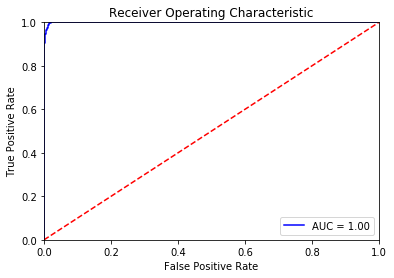

In [42]:
probs = logReg1.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
matrix = confusion_matrix(y_smote_test, y_smote_pred)
matrix

array([[3446,   70],
       [   3, 3650]], dtype=int64)

### Aplicando o modelo

In [63]:
# Treinando e prevendo quais alunos eram treineiros
_ = clf.fit(X, y)
y_pred = clf.predict(X_test)

answer = pd.DataFrame({'NU_INSCRICAO': inscricao, 'IN_TREINEIRO': y_pred})
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [50]:
#clf['preprocessor'].named_transformers_['encoder'].categories_

In [62]:
answer.to_csv('answer.csv', index_label=False)